# Método de Simpson

$$ \int_{a}^{b} f(x) \, dx \approx \tfrac{b-a}{6}\left[f(a) + 4f\left(\tfrac{a+b}{2}\right)+f(b)\right], $$

In [8]:
#Esta funcion "simpson" es muy similar a los ejercicios de la tarea 6,por ese motivo creo que no es necesario comentar cada parte ya que la explicación de cada paso se explica en dicha tarea
function simpson(f,a,b,N) 
    integral=0
    total=0
    x=linspace(a,b,N) 
    
    for i in 1:N-1 
    
        a=x[i] 
        b=x[i+1]  
   
       total=((b-a)/6)*(f(a)+(4*f((a+b)/2))+f(b)) #aquí es donde el código varía del método del rectángulo y del trapecio ya que ahora cambia la fórmula para calcular la integral
        
        integral=total+integral 
        
    end
    return integral 


LoadError: [91msyntax: incomplete: "function" at In[8]:2 requires end[39m

In [9]:
f(x)=x^2-14x-5 

f (generic function with 1 method)

In [10]:
simpson(f,0,10,50)

-416.6666666666667

# Método de interpolación de Lagrange
Ejercicio 4: Implementar método de interpolación de Lagrange en Julia. La función deberá recibir la lista de puntos  (xk,yk)(xk,yk)  y el lugar donde evaluamos el polinomio, note que es particularmente útil si los inputs son las listas de las  xx 's y de las  yy 's separadamente, es decir, de la misma forma en como la función plot recibe los argumentos; esto servira para verificar nuestros resultados. EJ.: Interpolador(listx,listy,x).

------

Antes de realizar el ejercicio haréuna prueba de cómo funciona la interpolación con algunos puntos aleatorios y así obtener el polinomio.

In [24]:
function inter(x,y)
    n=length(x) # es la cantidad de puntos que se tienen, da igual si es length(x) o length(y) ya que tienen el mismo número de entradas
   p=0 #p es el polinomio que busco
    for i in 1:n 
    L=1 #a "a" se le iran asignando los coeficientesde Lagrange
        for j in 1:n
            if i!=j #quiero que sean diferentes porque sino nos daría cero en el denominador
                
                L=L.*((x-x[j])/(x[i]-x[j])) #aqui se esta haciendo el proceso para encontrar los Li paso a paso utilizando ambos ciclos for y cada que se "camina" el segundo for, es decir j+1, se le multiplica el anterior. Cuando termina el ciclo for para j, "camina" el de i es decir ahora será i+1 y esto significaque ahora se calculará Li+1
            end
        end
        p=p+(y[i]*L) #al polinomio Li sele va multiplicando el respectivo y[i] y se van sumando todos para al final obtener el polinomio resultante
    end
   
    return p
end
 

inter (generic function with 1 method)

In [19]:
x=[1,4,-7]; #se definen las entradas del vector x

In [20]:
y=[-1,2,4];#se definen las entradas del vector y

In [25]:
inter(x,y)

3-element Array{Float64,1}:
 -1.0
  2.0
  4.0

Este resultado son los coeficientes del polinomio de grado n-1 y en este caso n-1=2 por lo tento es un polinomio de segundo grado y este resultado obtenido indica el siguiente polinomio
$$-x^2+2x+4$$

-----

* Interpole las funciones $\cos(x)$, $\cos^2(x)$ tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.


In [1]:
function inter(x)
    n=length(x) 
   p=0 
    for i in 1:n 
    L=1 
        for j in 1:n
            if i!=j
                
                L=L.*((x-x[j])/(x[i]-x[j])) 
            end
        end
        p=p+(f(x[i])*L) #todo lo anterior a la función de prueba solo que aquí cambia y yano se multplica por y, sino por f(x), es decir, la función evaluada en cada punto x
    end
   
    return p
end

inter (generic function with 1 method)

In [2]:
f(x)=cos(x)

f (generic function with 1 method)

In [3]:
using SymPy

In [4]:
x=[linspace(0,2pi,10)]#x serán 10 números entre 0 y 2pi 

1-element Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}:
 0.0:0.6981317007977318:6.283185307179586

In [5]:
inter(x)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] inter(::Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}) at ./In[1]:12
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[5], in expression starting on line 1


10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [6]:
using PyPlot

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] inter(::Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}) at ./In[1]:12
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[8], in expression starting on line 1


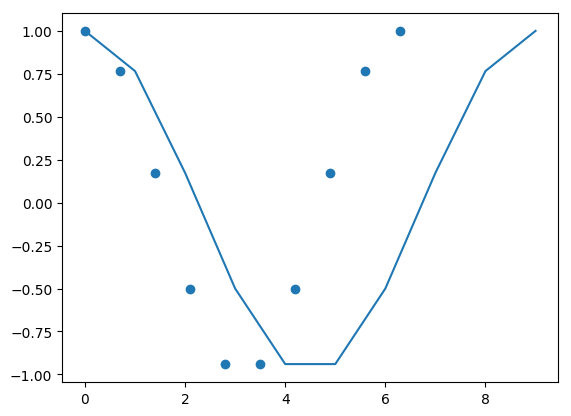

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] inter(::Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}) at ./In[1]:12
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[8], in expression starting on line 2


In [8]:
scatter(x,inter(x))
plot(inter(x))
show;

* Interpole los los siguientes puntos: `[(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]`.Grafique los puntos a interpolar y la funcion interpoladora.


In [14]:
function inter(x,y)
    n=length(x) 
   p=0 
    for i in 1:n 
    L=1 
        for j in 1:n
            if i!=j
                
                L=L.*((x-x[j])/(x[i]-x[j])) 
            end
        end
         p=p+(y[i]*L)
    end
   
    return p
end

inter (generic function with 2 methods)

In [15]:
x=[0,2,3,4,5,6,7];

In [16]:
y=[10,-10,-4,0,5,20,-1];

In [17]:
inter(x,y)

7-element Array{Float64,1}:
  10.0
 -10.0
  -4.0
   0.0
   5.0
  20.0
  -1.0

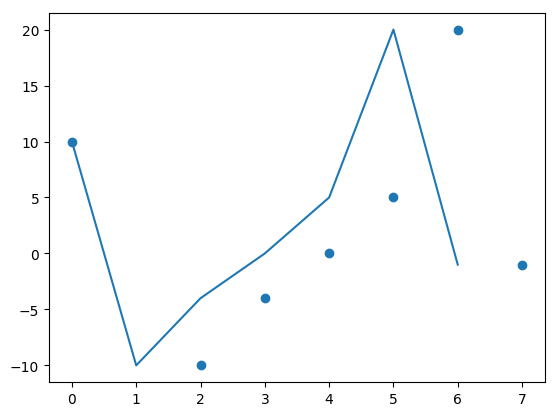

In [18]:
scatter(x,y)
plot(inter(x,y))
show();